In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv("Student_Performance.csv")


data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Shape of data: (10000, 6)

Missing values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Data types:
 Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


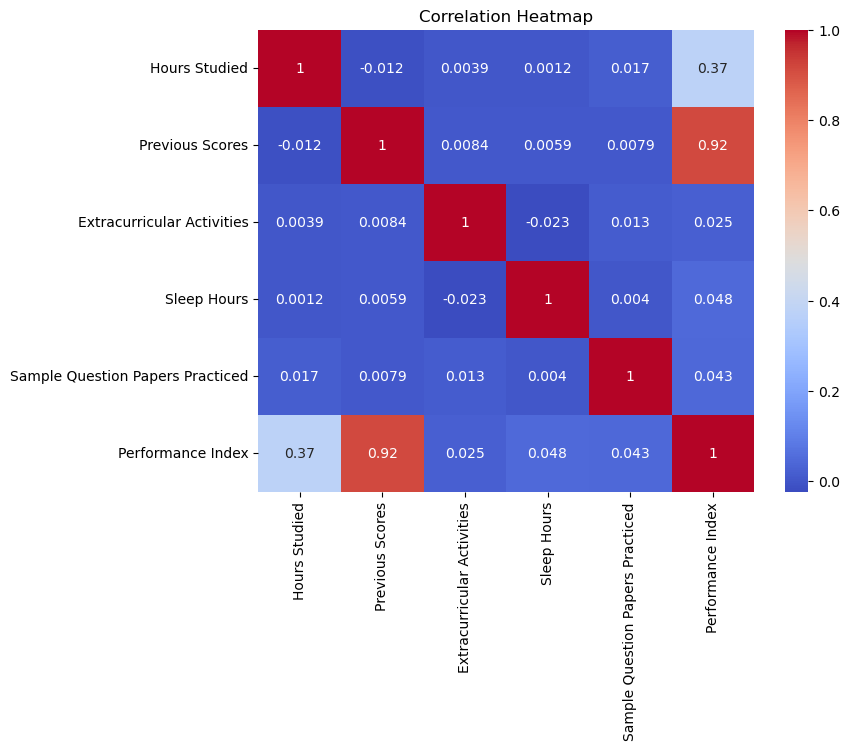

In [5]:
print("Shape of data:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [6]:
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R² Score: 0.9889832909573145
Linear Regression RMSE: 2.0205515085050063


In [8]:
ridge = Ridge(alpha=10)  # alpha = regularization strength
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Regression R² Score: 0.9889830167755889
Ridge Regression RMSE: 2.020576651896297


C:\Users\Vinayak\AppData\Local\Temp\ipykernel_7516\71070011.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='viridis')
C:\Users\Vinayak\AppData\Local\Temp\ipykernel_7516\71070011.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_scores, palette='mako')


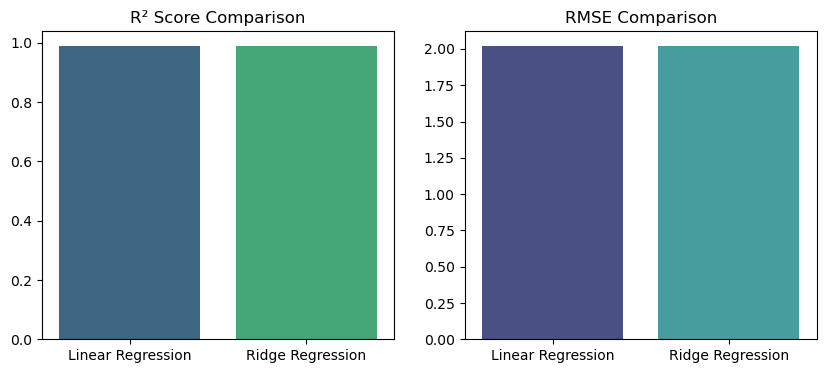

In [9]:
models = ['Linear Regression', 'Ridge Regression']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_ridge)]
rmse_scores = [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_ridge))]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.title("R² Score Comparison")

plt.subplot(1,2,2)
sns.barplot(x=models, y=rmse_scores, palette='mako')
plt.title("RMSE Comparison")

plt.show()


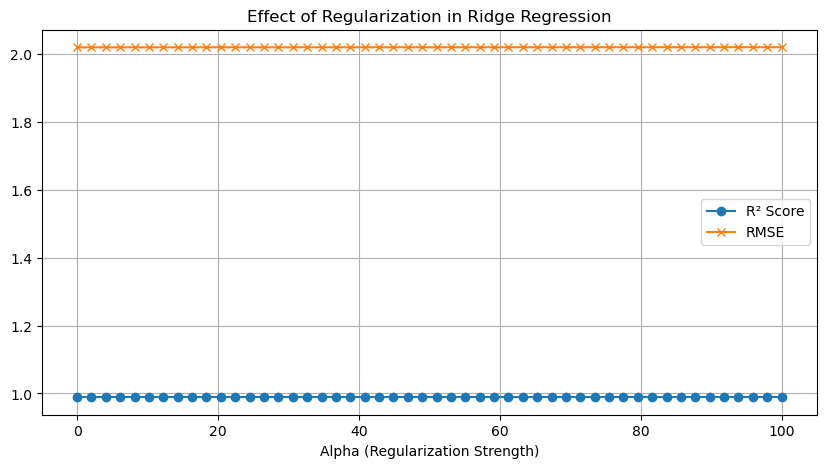

In [10]:
alphas = np.linspace(0, 100, 50)
r2_list, rmse_list = [], []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2_list.append(r2_score(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(10,5))
plt.plot(alphas, r2_list, label="R² Score", marker='o')
plt.plot(alphas, rmse_list, label="RMSE", marker='x')
plt.xlabel("Alpha (Regularization Strength)")
plt.title("Effect of Regularization in Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()


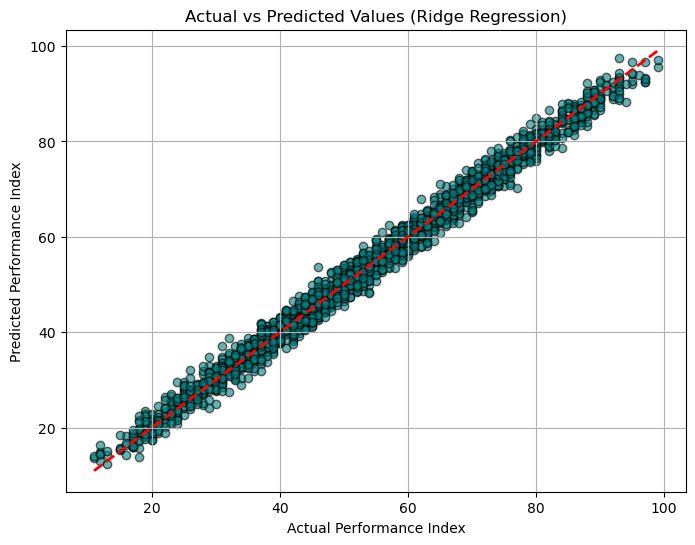

In [11]:
# Step 11: Actual vs Predicted Plot for Ridge Regression

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, color='teal', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Values (Ridge Regression)")
plt.grid(True)
plt.show()

